## Time Series Analysis in Python  
1. Correlation and Autocorrelaction
2. Some Simple Time Series
3. Autoregressive (AR) Models
4. Moving Average (MA) and ARMA models
5. Putting it all together

[link](https://campus.datacamp.com/courses/time-series-analysis-in-python/autoregressive-ar-models?ex=2)

### 1. Correlation and Autocorrelaction

#### Some Useful Pandas Tools  
* Changing an index to datetime
`df.index = pd.to_datetime(df.index)`
* Plotting data, if index has been converted do datetime object we can slice data by year for example  
`df.plot()`  
* Merging two panda df  
`df1.join(df2)`  
* Often we want to change finacial ts data like prices to returns or differences, using two methods.  
`df['col'].pct_change()`  
`df['col'].diff()`  
* pandas correlation method of series is usefull  
`df['XYZ'].corr(df['ABC'])`  

In [1]:
!python --version

Python 3.7.12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [3]:
# select file to upload : SP500.csv, BAA10Y.csv, mltiTimeline.csv
uploaded = files.upload()
#uploaded

Saving SP500.csv to SP500.csv
Saving BAA10Y.csv to BAA10Y.csv
Saving multiTimeline.csv to multiTimeline.csv


In [4]:
# check
print(uploaded['multiTimeline.csv'][0:50])
print(uploaded['BAA10Y.csv'][0:50])
print(uploaded['SP500.csv'][0:50])

b'week,diet\r\n2017-01-22,55\r\n2017-01-29,68\r\n2017-02-0'
b'DATE,BAA10Y\n2017-01-20,2.21\n2017-01-23,2.21\n2017-0'
b'DATE,SP500\n2017-01-23,2265.2\n2017-01-24,2280.07\n20'


In [5]:
# load as df
diet = pd.read_csv(io.StringIO(uploaded['multiTimeline.csv'].decode('utf-8')))

# rename week to Date and set as index
diet = diet.rename(columns={'week': 'Date'})
diet.set_index('Date', inplace=True)

# Convert the date index to datetime (to be able to slice it later)
diet.index = pd.to_datetime(diet.index)

#print(diet.index)
diet.head()

,diet
Date,
2017-01-22,55
2017-01-29,68
2017-02-05,64
2017-02-12,73
2017-02-19,55


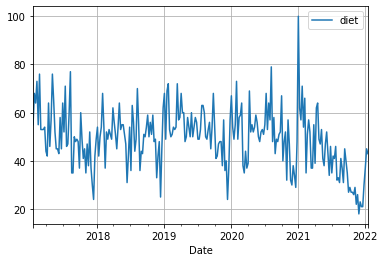

In [6]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

With the index as datetime it looks much nicer on the x-axis with full years.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


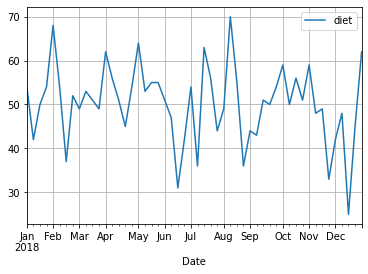

In [7]:
# Slice the dataset to keep only 2018
diet.index = pd.to_datetime(diet.index)

# Slice the dataset to keep only 2018
diet2018 = diet['2018']

# Plot 2018 data
diet2018.plot(grid=True)
plt.show()

In [8]:
# load bonds data
bonds = pd.read_csv(io.StringIO(uploaded['BAA10Y.csv'].decode('utf-8')), decimal='.')
bonds.set_index('DATE', inplace=True)
bonds.index = pd.to_datetime(bonds.index)
print(bonds.shape)
bonds.head()

(1305, 1)


,BAA10Y
DATE,
2017-01-20,2.21
2017-01-23,2.21
2017-01-24,2.22
2017-01-25,2.21
2017-01-26,2.20


In [9]:
# load stocks data
stocks = pd.read_csv(io.StringIO(uploaded['SP500.csv'].decode('utf-8')))
stocks.set_index('DATE', inplace=True)
stocks.index = pd.to_datetime(bonds.index)
print(stocks.shape)
stocks.head()

(1305, 1)


,SP500
DATE,
2017-01-20,2265.2
2017-01-23,2280.07
2017-01-24,2298.37
2017-01-25,2296.68
2017-01-26,2294.69


In [10]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print (stock set minus bonds set)
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how="inner")

stocks_and_bonds.head()

set()


,SP500,BAA10Y
DATE,,
2017-01-20,2265.2,2.21
2017-01-23,2280.07,2.21
2017-01-24,2298.37,2.22
2017-01-25,2296.68,2.21
2017-01-26,2294.69,2.20


In [11]:
#stocks_and_bonds = stocks_and_bonds.apply(pd.to_numeric)

# Convert object (string) to float
stocks_and_bonds['SP500'] = pd.to_numeric(stocks_and_bonds['SP500'], errors='coerce')
stocks_and_bonds['BAA10Y'] = pd.to_numeric(stocks_and_bonds['BAA10Y'], errors='coerce')

print(stocks_and_bonds.info())
stocks_and_bonds.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2017-01-20 to 2022-01-20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1260 non-null   float64
 1   BAA10Y  1249 non-null   float64
dtypes: float64(2)
memory usage: 62.9 KB
None


,SP500,BAA10Y
DATE,,
2017-01-20,2265.20,2.21
2017-01-23,2280.07,2.21
2017-01-24,2298.37,2.22
2017-01-25,2296.68,2.21
2017-01-26,2294.69,2.20


**Correlation of Two Time Series**  
Often, stock prices vary together.  
Common mistake: Correlation of Two trending series.  
You can get high correlation of two time series even when they are totally unrelated. Therefore, if you look at the correlation of two stocks *we should look at the correlations of their returns and not their levels*.  
* Correlation of levels can be high  
* Correlation of percent changes can be approximately 0  
  
Correlation of returns.  
* First step, compute the percent change of both series using the pandas `pct_change()` method and then `corr()` method.  
`df['series_1_ret'] = df['series_1'].pct_change()`  
`df['series_2_ret'] = df['series_2'].pct_change()`  
* then `corr()` method.  
`correlation = df['series_1_ret`].corr(df.['series_2_ret'])  
* Visualize the correlation.  
`plt.scatter(df['series_1_ret'], df['series_2_ret'])`  

  


Correlation of values: -0.21983942840413453


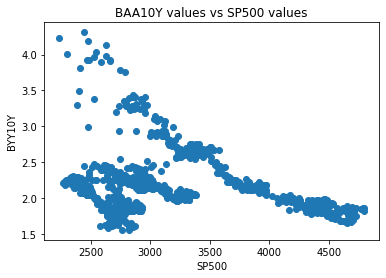

In [12]:
# compute correlation of values
value_corr = stocks_and_bonds['SP500'].corr(stocks_and_bonds['BAA10Y'])
print(f"Correlation of values: {value_corr}")

# scatter plot values first
plt.scatter(stocks_and_bonds['SP500'], stocks_and_bonds['BAA10Y'])
plt.title("BAA10Y values vs SP500 values")
plt.xlabel("SP500")
plt.ylabel("BYY10Y")
plt.show()

Seems to be a weak negative correlation of values.

In [13]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()
returns.head()

,SP500,BAA10Y
DATE,,
2017-01-20,NaN,NaN
2017-01-23,0.006565,0.000000
2017-01-24,0.008026,0.004525
2017-01-25,-0.000735,-0.004505
2017-01-26,-0.000866,-0.004525


Correlation of returns: 0.013730340983812348


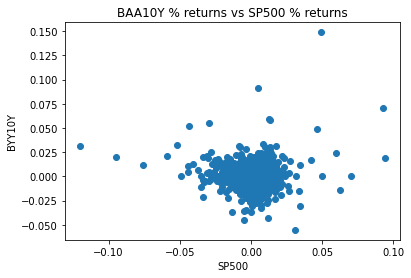

In [14]:
# compute correlation of returns
returns_corr = returns['SP500'].corr(returns['BAA10Y'])
print(f"Correlation of returns: {returns_corr}")

# scatter plot % change
plt.scatter(returns['SP500'],returns['BAA10Y'])
plt.title("BAA10Y % returns vs SP500 % returns")
plt.xlabel("SP500")
plt.ylabel("BYY10Y")
plt.show()

There is no correlatation in returns compared to values above.  
  

**Simple Linear Regression of Times Series**  
* Simple linear regression:  
We can assume that the *true* relationship between variables Y and X can be formulated as:
$$_{Y_t=f(X_t) + \epsilon_t}$$  
We can try to approximate $$_{f(X)} $$
by a linear function can formulate it like this:  
$$_{y_t=\alpha+\beta x_t + \epsilon_t}$$
The `y` and `x` can be two time series.  
Also known as OLS (Ordinary Least Squares)  
  
**Python Packages to Perform Regression**  
* In statsmodels:
`import statsmodels.api as sm`  
`sm.OLS(y, x).fit()`  
  
* In numpy:
`np.polyfit(x, y, deg=1)` deg = 1 is first degree (fits data to a line)  
  
* In pandas:  
`pd.ols(y, x)`  
  
* In scipy:  
`from scipy import stats`  
`stats.linregress(x, y)`  
  
Note: The order of `x` and `y` is not consistent across packages!  

Example: Regression of Small Cap Returns on Large Cap  
* Import statsmodels module  
`import statsmodels.api as sm`  
  
* As previously, compute percentage change in both series  
`df['SPX_Rex'] = df['SPX_Prices'].pct_change()`  
`df['R2000_Ret'] = df['R2000_Prices'].pct_changes()`  
  
* Add constans to the DataFrame for regression intercept  
`df = sm.add_constant(df)`  
We add a column of 1s as a dependent right hand side variable, this is because if there is no constant column we would want a regression without and intercept. By adding a column of 1s stats model will compute the regression coefficient for that column as well. Which can be interprete as the intercept of the line.  
  
* The first row of returns is NaN.  
* Delete the ros of NaN  
`df = df.dropna()`  
  
* Run regression  
`results = sm.OLS(df['R2000_Ret'], df[['const','SPX_Ret']]).fit()`  
The method fit() runs the regression and the results are saved in a class instance called results.  
`print(results.summary())`  


In [15]:
# example
import statsmodels.api as sm

# add returns
stocks_and_bonds['SP500_Ret'] = stocks_and_bonds['SP500'].pct_change()
stocks_and_bonds['BAA10Y_Ret'] = stocks_and_bonds['BAA10Y'].pct_change()
df = stocks_and_bonds
df = sm.add_constant(df)
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
df.head()

,const,SP500,BAA10Y,SP500_Ret,BAA10Y_Ret
DATE,,,,,
2017-01-23,1.0,2280.07,2.21,0.006565,0.000000
2017-01-24,1.0,2298.37,2.22,0.008026,0.004525
2017-01-25,1.0,2296.68,2.21,-0.000735,-0.004505
2017-01-26,1.0,2294.69,2.20,-0.000866,-0.004525
2017-01-27,1.0,2280.90,2.19,-0.006010,-0.004545


In [17]:
results = sm.OLS(df['SP500_Ret'],df[['const','BAA10Y_Ret']]).fit() # left is y, right is X´s
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SP500_Ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2392
Date:                Thu, 17 Mar 2022   Prob (F-statistic):              0.625
Time:                        20:32:00   Log-Likelihood:                 3594.3
No. Observations:                1203   AIC:                            -7185.
Df Residuals:                    1201   BIC:                            -7174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.838      0.0

We can also manually calculate the coefficients to double check the coefficients from the `sm.OLS()` method.  
$$\hat\beta_{1}= {{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})} \over \sum_{i=1}^n(x_i - \bar{x})^2 } }   $$

$$\hat\beta_{0}= \bar{y}-\hat\beta_{1}\bar{x} $$


In [18]:
# Manual calculation of coeffs

# Calculate terms
y_mean = df["SP500_Ret"].mean()
x_mean = df["BAA10Y_Ret"].mean()
#print(f'y_mean: {y_mean}')
#print(f'x_mean: {x_mean}')
y_minus_y_mean = df["SP500_Ret"]-y_mean
x_minus_x_mean = df["BAA10Y_Ret"]-x_mean

beta1_numerator = np.sum(x_minus_x_mean*y_minus_y_mean)
#print(beta_numerator)
beta1_denominator = np.sum(x_minus_x_mean**2)
#print(beta_denominator)
beta1=(beta1_numerator/beta1_denominator)
print(f'BAA10Y_Ret coefficient: {beta1}')

beta0 = y_mean - (beta1*x_mean)
print(f'const coefficient: {beta0}')
# These match the OLS summary output

BAA10Y_Ret coefficient: 0.014468438689413284
const coefficient: 0.0006466844215594462


In the output the coeff `0.0145` is the slope of the regression. const is the intercept which is very close to zero.  
  
Can also pull out the following specific info  
* Intercept in `results.params[0]`
* Slope in `results.params[1]`  

In [19]:
print(results.params[0])
print(results.params[1])

0.0006466844215594464
0.01446843868941325


We can calculate the Standard Error for the coefficient estimation:
$$SE(\hat\beta_{1})^2={{\sigma^2 \over \sum_{i=1}^n(x_i - \bar{x})^2 } } $$

In [39]:
# sigma
#population_variance = (np.sum(x_minus_x_mean**2) / df.shape[0])
#print(f'Population variance: {population_variance}')

# variance of the errors
#   from above we have the numerator of the variance...
y_minus_y_mean = df["SP500_Ret"]-y_mean
#   ... divided by n-2 observations (instead of n)
variance_of_errors = (np.sum(y_minus_y_mean**2) / (df.shape[0]-2))
print(f'Variance of errors: {variance_of_errors}')

# From previous step, repeated!
beta1_denominator = np.sum(x_minus_x_mean**2)
print(f'Denominator: {beta1_denominator}')

standard_error_b1_squared = variance_of_errors / beta1_denominator  
print(f'SE beta1 squared: {standard_error_b1_squared}')

standard_error_b1 = standard_error_b1_squared**0.5
print(f'SE beta1: {standard_error_b1}')

Variance of errors: 0.000149000730501903
Denominator: 0.17024684805302787
SE beta1 squared: 0.0008752040475691672
SE beta1: 0.02958384774787024


Our manually calculated `SE` is rounded to `0.030` in the regression output. 


We can also manually calculate the confidence interal for our coefficient esimation:  
$$\hat\beta_{1} +-2*SE{(\hat\beta_{1})} $$
There is approximately 95% change that this interval will contain the true values of the coefficient. We can do this for one or both of the coefficients.

In [ ]:
# Calculate CI for beta1 coefficient using Std err
# UCI
UCI = beta1 + (2*0.030)
# LCI
LCI = beta1 - (2*0.030)
print(f'The beta1 coefficient point estimate is: {beta1}')
print(f'The beta1 cofidence interval is: {UCI},{LCI}')

The beta1 coefficient point estimate is: 0.014468438689413284
The beta1 cofidence interval is: 0.07446843868941327,-0.045531561310586714


In this example, the SE is larger in magnitude than the point estimate itself, which creates a wide confidence interval with different signs of the upper and lower interals. Indicating uncertainty in the point estimate.

The relationship between R-squared and Correlation  
* [corr(x,y)]^2 = R^2 (or R-squared)
* sign(corr) = sign(regression slope)  

In [ ]:
r = df['SP500_Ret'].corr(df['BAA10Y_Ret'])
print(r)    # r corr coefficient
print(r**2) # r2

0.014112225447628343
0.000199154907084689


**Autocorrelcation**  
* Correlation of a time series lagged copy of itself  
It is also called serial correlation. Often when we refer to a series autocorrelation we mean the lag-1 correlation.  
* Lag-one autocorrelation  
E.g a series that is lagged with one day  
* **Mean Reversion** - Negative autocorrelation
* **Momentum** or **Trend Following** - Positive autocorrelation  
  
Traders use autocorrelation to make money.  
* Individual stocks  
 * Historically have typically negative autocorrelation of about a week. A popular strategy is to buy stocks that have dropped over the past week and sell stocks that have gone up
 * Measured over short time horizons (days) 
  
Example of positive autocorrelation: Exchange rates  
* Use daily exchange rates in a `df` from FRED  
FRED = Federal Reserve Economic Data
* Convert index to datetime

In [ ]:
# DO NOT RUN

#convert index to datetime
df.index = pd.to_datetime(df.index)
# Downsample from daily to monthly data
df = df.resample(rule='M', how='last')
# Compute returns from prices
df['Return'] = df['Price'].pct_change()
# Compute autocorrelation
autocorrelation = df['Return'].autocorr()
print("The ac is: ",autocorrelation)

Look at some stocks and use the popular strategy of weekly mean reversion. Prices tend to bounce back, or revert, towards a previous level after large moves, which are observerd over time horizons of about a week.

In [ ]:
# Create returns pandas series from the above df
returns = stocks_and_bonds[['SP500_Ret']]
returns = returns.dropna()

# Convert daily data to weekly
returns = returns.resample(rule='W').last()

# Compute and print the autocorrelation
autocorrelation = returns['SP500_Ret'].autocorr()
print(f"The autocorrelation of weekly returns is {autocorrelation}")

The autocorrelation of weekly returns is 0.1751497875364545


The autocorrelation of weekly returns is positive, so we have Moment or Trend Following pattern. Check this visually by plotting the series also.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


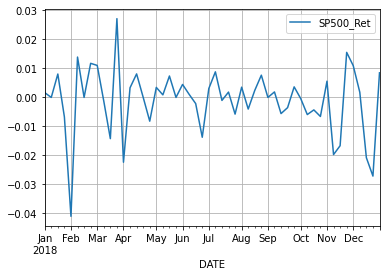

In [ ]:
import matplotlib.pyplot as plt

# take one year sample
returns_2018 = returns['2018']
returns_2018.plot(grid=True)
plt.show()

In [ ]:
# Jatka tästä
# https://campus.datacamp.com/courses/time-series-analysis-in-python/some-simple-time-series?ex=1